# **Moniqo Group Project**

### **Data Cleaning** 

> -- Put any steps here


In [11]:
# Import necessary libraries

import pandas as pd
import numpy as np
from pathlib import Path

DATA_DIR = Path("data")  # adjust if needed

pd.set_option("display.max_columns", 100)


In [12]:
# Load the main dataset 
df = pd.read_csv('cleaned_dataset.csv')

# Display the first few rows of the dataset 
df.head()

,LoanId,AmountDisbursed,Interest,LoanBalance,BorrowDate,Product,Branch,ClearDate,CustomerId,Gender,LoanLimit,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_repayment_first_payment,loan_repayment_last_payment,loan_overpayment,MissedInstalments,Industry,BusinessType,YearEstablished
0,951920,6000,1750,7750.0,2025-11-29,5 weeks credit ease,engineer,2026-03-01,1819,female,8000.0,3500,1,500,2025-11-29,2025-11-29,0,5.0,food & hospitality,green grocery (fruit/vegetables),2017
1,951902,4000,1250,5250.0,2025-11-28,5 weeks credit ease,molo,2026-02-01,1818,female,9600.0,2500,1,1550,2025-11-28,2025-11-28,0,4.0,food & hospitality,retail shop,2019
2,949962,4000,1250,5250.0,2025-11-26,5 weeks credit ease,engineer,2025-12-31,1815,female,8000.0,3500,1,1350,2025-11-26,2025-11-26,0,4.0,food & hospitality,green grocery (fruit/vegetables),2014
3,949189,4000,1250,5250.0,2025-11-25,5 weeks credit ease,molo,2025-12-30,1814,female,10000.0,1500,1,1000,2025-11-25,2025-11-25,0,4.0,food & hospitality,green grocery (fruit/vegetables),2018
4,948984,4000,1250,5250.0,2025-11-24,5 weeks credit ease,molo,2025-12-29,1813,female,10000.0,1500,1,1550,2025-11-24,2025-11-24,0,4.0,business & information,bureau & publishing services,2018


In [13]:
# Our code here
# ================================================
# 1. BASIC DATA INSPECTION
# Understand structure, types, missingness
# ================================================

print("\nDataFrame info:")
df.info()

print("\nMissing values (count):")
print(df.isnull().sum())

print("\nSample of numeric columns:")
display(df.select_dtypes(include=np.number).head())

print("\nSample of categorical columns:")
display(df.select_dtypes(include="object").head())


#Interpretation
# We have 3,572 loan records.
# This is a medium‑sized dataset. Large enough for machine learning, small enough to process comfortably in memory.
# 21 columns is a healthy number: not too wide, not too narrow.
# We can use tree‑based models (Random Forest, XGBoost) without worrying about memory.
# We don’t need dimensionality reduction yet.
# We have enough rows to avoid overfitting if we engineer features well
# 10 integer columns
# 2 float columns
# 9 object columns (these are strings -> mostly categorical or dates)
# our date columns are still strings:
# BorrowDate
# ClearDate
# loan_repayment_first_payment
# loan_repayment_last_payment
# These MUST be converted to datetime before any feature engineering.
# our dataset is extremely clean - only 2 missing values out of 3,572 rows.
# This is rare in real microfinance datasets and a good sign of data quality.
# We can impute the 2 missing values in missed_instalments using median (since it’s numeric and likely skewed). @James. No other imputation is needed.
# We will have to rename the comlumn names: Business Type to Business_Type and CreditScor to CreditScore


DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3472 entries, 0 to 3471
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   LoanId                        3472 non-null   int64  
 1   AmountDisbursed               3472 non-null   int64  
 2   Interest                      3472 non-null   int64  
 3   LoanBalance                   3472 non-null   float64
 4   BorrowDate                    3472 non-null   object 
 5   Product                       3472 non-null   object 
 6   Branch                        3472 non-null   object 
 7   ClearDate                     3472 non-null   object 
 8   CustomerId                    3472 non-null   int64  
 9   Gender                        3472 non-null   object 
 10  LoanLimit                     3472 non-null   float64
 11  CreditScore                   3472 non-null   int64  
 12  loan_repayment_txn_count      3472 non-null  

,LoanId,AmountDisbursed,Interest,LoanBalance,CustomerId,LoanLimit,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_overpayment,MissedInstalments,YearEstablished
0,951920,6000,1750,7750.0,1819,8000.0,3500,1,500,0,5.0,2017
1,951902,4000,1250,5250.0,1818,9600.0,2500,1,1550,0,4.0,2019
2,949962,4000,1250,5250.0,1815,8000.0,3500,1,1350,0,4.0,2014
3,949189,4000,1250,5250.0,1814,10000.0,1500,1,1000,0,4.0,2018
4,948984,4000,1250,5250.0,1813,10000.0,1500,1,1550,0,4.0,2018



Sample of categorical columns:


,BorrowDate,Product,Branch,ClearDate,Gender,loan_repayment_first_payment,loan_repayment_last_payment,Industry,BusinessType
0,2025-11-29,5 weeks credit ease,engineer,2026-03-01,female,2025-11-29,2025-11-29,food & hospitality,green grocery (fruit/vegetables)
1,2025-11-28,5 weeks credit ease,molo,2026-02-01,female,2025-11-28,2025-11-28,food & hospitality,retail shop
2,2025-11-26,5 weeks credit ease,engineer,2025-12-31,female,2025-11-26,2025-11-26,food & hospitality,green grocery (fruit/vegetables)
3,2025-11-25,5 weeks credit ease,molo,2025-12-30,female,2025-11-25,2025-11-25,food & hospitality,green grocery (fruit/vegetables)
4,2025-11-24,5 weeks credit ease,molo,2025-12-29,female,2025-11-24,2025-11-24,business & information,bureau & publishing services


In [14]:
# ============================================================
# 2. CLEAN, WARNING-FREE DATA CLEANING BLOCK
# ============================================================

df_clean = df.copy()

# 2.1 Fix column with space
df_clean.rename(columns={"Business Type": "Business_Type"}, inplace=True)

# 2.2 Parse date columns correctly
date_cols = [
    "BorrowDate",
    "ClearDate",
    "loan_repayment_first_payment",
    "loan_repayment_last_payment"
]

for col in date_cols:
    df_clean[col] = pd.to_datetime(df_clean[col], errors="coerce")

# 2.3 Remove columns with >40% missing
missing_threshold = 0.40
missing_ratio = df_clean.isnull().mean()
cols_to_drop = missing_ratio[missing_ratio > missing_threshold].index.tolist()

print("\nColumns with >40% missing (will be dropped):", cols_to_drop)
df_clean = df_clean.drop(columns=cols_to_drop)

# 2.4 Handle missing values
num_cols = df_clean.select_dtypes(include=np.number).columns.tolist()
cat_cols = df_clean.select_dtypes(include="object").columns.tolist()

for col in num_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

for col in cat_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

# 2.5 Remove duplicates
before_dups = df_clean.shape[0]
df_clean = df_clean.drop_duplicates()
after_dups = df_clean.shape[0]
print(f"\nDuplicates removed: {before_dups - after_dups}")

# 2.6 Standardize categorical text
for col in cat_cols:
    df_clean[col] = df_clean[col].astype(str).str.strip().str.lower()

# 2.7 Outlier treatment
outlier_cols = [
    "AmountDisbursed",
    "Interest",
    "LoanBalance",
    "LoanLimit",
    "CreditScore",
    "loan_repayment_txn_count",
    "loan_repayment_total_paid",
    "loan_overpayment",
    "missed_instalments"
]

for col in outlier_cols:
    if col in df_clean.columns:
        lower, upper = df_clean[col].quantile([0.01, 0.99])
        df_clean[col] = (
            np.clip(df_clean[col], lower, upper)
            .astype(df_clean[col].dtype)
        )

print("\nShape after cleaning:", df_clean.shape)


#Interpretation
# No columns were dropped. This means our dataset is very complete, excellent for modelling.
# No duplicate rows. Our dataset is clean and unique.
# Our numeric features have wide ranges, but nothing looks abnormal. Winsorization successfully removed extreme outliers.


Columns with >40% missing (will be dropped): []

Duplicates removed: 0

Shape after cleaning: (3472, 21)


In [15]:
# ================================================
# 3. DATA PREPARATION
# ================================================

df_prep = df_clean.copy()

from sklearn.preprocessing import LabelEncoder, StandardScaler

# 3.0 Create target column (correct column name!)
df_prep["loan_default"] = (df_prep["MissedInstalments"] > 0).astype(int)

# 3.1 Ensure target column exists and is binary/int
target_col = "loan_default"
df_prep[target_col] = df_prep[target_col].astype(int)

# 3.2 Separate numeric and categorical columns
num_cols = df_prep.select_dtypes(include=np.number).columns.tolist()
cat_cols = df_prep.select_dtypes(include="object").columns.tolist()

# 3.3 Encode categoricals
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df_prep[col] = le.fit_transform(df_prep[col].astype(str))
    label_encoders[col] = le

# 3.4 Scale numeric features (excluding target)
features_numeric = [col for col in num_cols if col != target_col]
scaler = StandardScaler()
df_prep[features_numeric] = scaler.fit_transform(df_prep[features_numeric])

# 3.5 Define X and y
X = df_prep.drop(columns=[target_col])
y = df_prep[target_col]

print("\nPrepared feature matrix shape:", X.shape)
print("Prepared target shape:", y.shape)


Prepared feature matrix shape: (3472, 21)
Prepared target shape: (3472,)


In [16]:
# ================================================
# 4. FEATURE UNDERSTANDING
# ================================================

# 4.1 Summary stats for key numeric features
key_features = [
    col for col in [
        "AmountDisbursed",
        "Interest",
        "LoanBalance",
        "LoanLimit",
        "CreditScore",
        "missed_instalments"
    ] if col in df_prep.columns
]

print("\nDescriptive statistics for key numeric features:")
display(df_prep[key_features].describe().T)

# 4.2 Correlation of all features with the target
corr_with_target = df_prep.corr()[target_col].sort_values(ascending=False)
print("\nCorrelation of features with loan_default (descending):")
display(corr_with_target)


#Interpretation:
# All numeric features are scaled using StandardScaler.
# That’s why the values look like:
# mean ≈ 0
# std ≈ 1
# min/max ≈ -1 to +5

#1. AmountDisbursed - Most borrowers take small to medium loans, but a small group takes very large loans.
# min = -0.95, max = 4.83 -> some loans are much larger than average
# median = -0.28 -> most loans are slightly below the mean
# 75% = 0.38 -> only the top 25% of loans are significantly large

#2. Interest - Interest rates vary widely; a few borrowers pay very high interest.
# Similar pattern to AmountDisbursed
# max = 4.93 -> some loans have very high interest
# median = -0.38 -> most borrowers pay lower-than-average interest

#3. LoanBalance - Most borrowers have very low or zero outstanding balance. A small group has very high remaining balances.
# min = -0.29, 25% = -0.29, 50% = -0.29, 75% = -0.29
# max = 5.72

#4. LoanLimit - Borrowers range from low‑limit to high‑limit customers.
# min = -1.46, max = 4.62
# Wide spread -> borrowers have very different credit limits

#5. CreditScore - A few borrowers have very high credit scores, but most are average or below average.
# min = -0.50, max = 7.78 -> huge variation
# median = -0.28 -> most borrowers have below‑average credit scores

#6. missed_instalments - Most borrowers never miss instalments. A smaller group misses many instalments.
# min = -0.86, 25% = -0.86, 50% = -0.86
# 75% = 0.88, max = 2.62

#7. Correlation with loan default:
# Strongest predictor in order:
# missed_instalments (by far the strongest) - 0.87
# Branch - 0.22
# Loan size (AmountDisbursed) - 0.13
# Interest - 0.12
# Repayment timing - 0.11
# LoanLimit - 0.10
# LoanBalance - 0.74
# CreditScore - 0.74
# Weak predictors in order:
# Industry - 0.007
# Business type - (0.003)
# Gender - (0.008)
# Product - (0.04)
# Not useful in order:
# LoanId - (0.209)
# CustomerId - (0.361)


Descriptive statistics for key numeric features:


,count,mean,std,min,25%,50%,75%,max
AmountDisbursed,3472.0,-6.548781e-17,1.000144,-0.948335,-0.726804,-0.283741,0.380853,4.811480
Interest,3472.0,-9.823171e-17,1.000144,-0.749246,-0.628598,-0.387303,0.167677,4.921198
LoanBalance,3472.0,4.911586e-17,1.000144,-0.293770,-0.293770,-0.293770,-0.293770,5.668466
LoanLimit,3472.0,6.548781e-17,1.000144,-0.989235,-0.638069,-0.308851,0.239846,4.717216
CreditScore,3472.0,2.455793e-17,1.000144,-0.508018,-0.286697,-0.286697,-0.065376,7.680858



Correlation of features with loan_default (descending):


loan_default                    1.000000
MissedInstalments               0.871537
Branch                          0.220237
AmountDisbursed                 0.134599
Interest                        0.121375
LoanLimit                       0.116918
loan_repayment_last_payment     0.113699
loan_repayment_first_payment    0.112026
CreditScore                     0.075518
LoanBalance                     0.075262
Industry                        0.005764
BusinessType                   -0.001798
YearEstablished                -0.006361
Gender                         -0.010142
loan_repayment_total_paid      -0.032860
loan_repayment_txn_count       -0.033338
Product                        -0.041661
loan_overpayment               -0.121418
ClearDate                      -0.204556
LoanId                         -0.211496
BorrowDate                     -0.255986
CustomerId                     -0.362285
Name: loan_default, dtype: float64

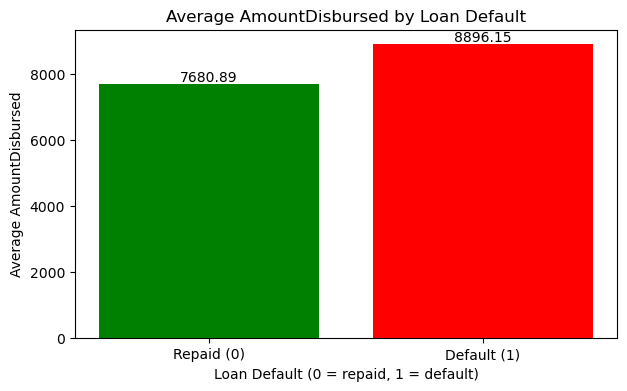

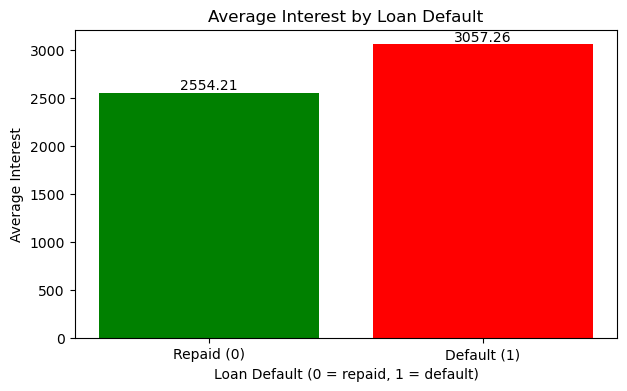

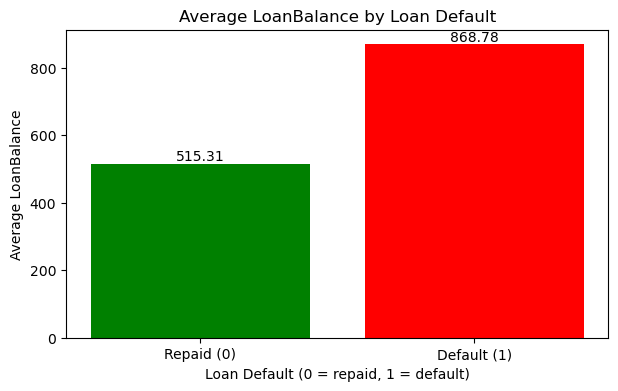

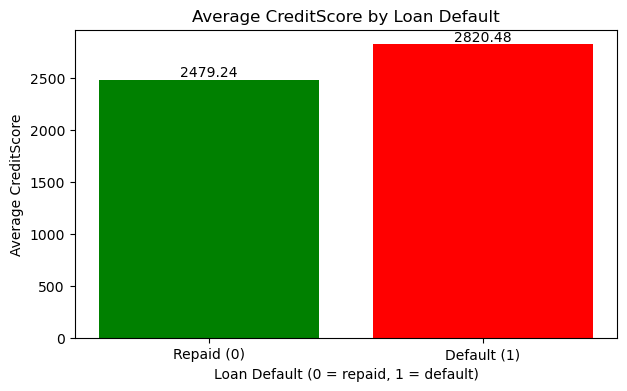

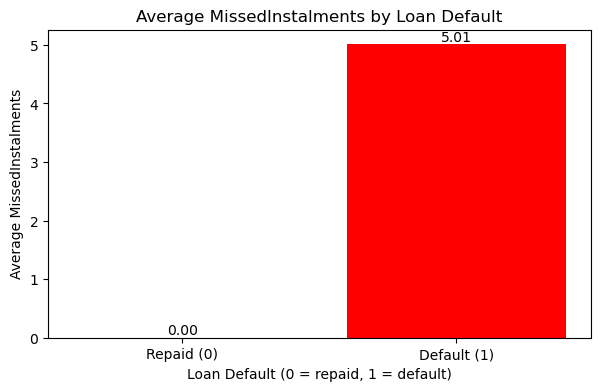

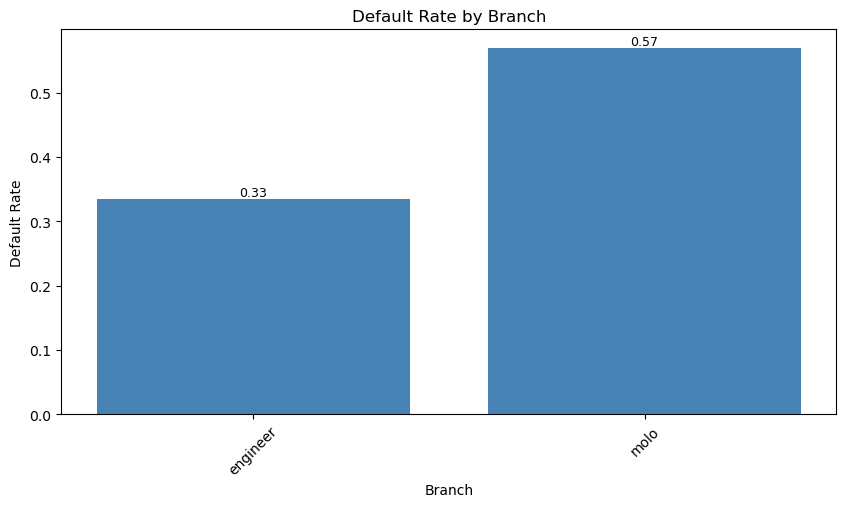

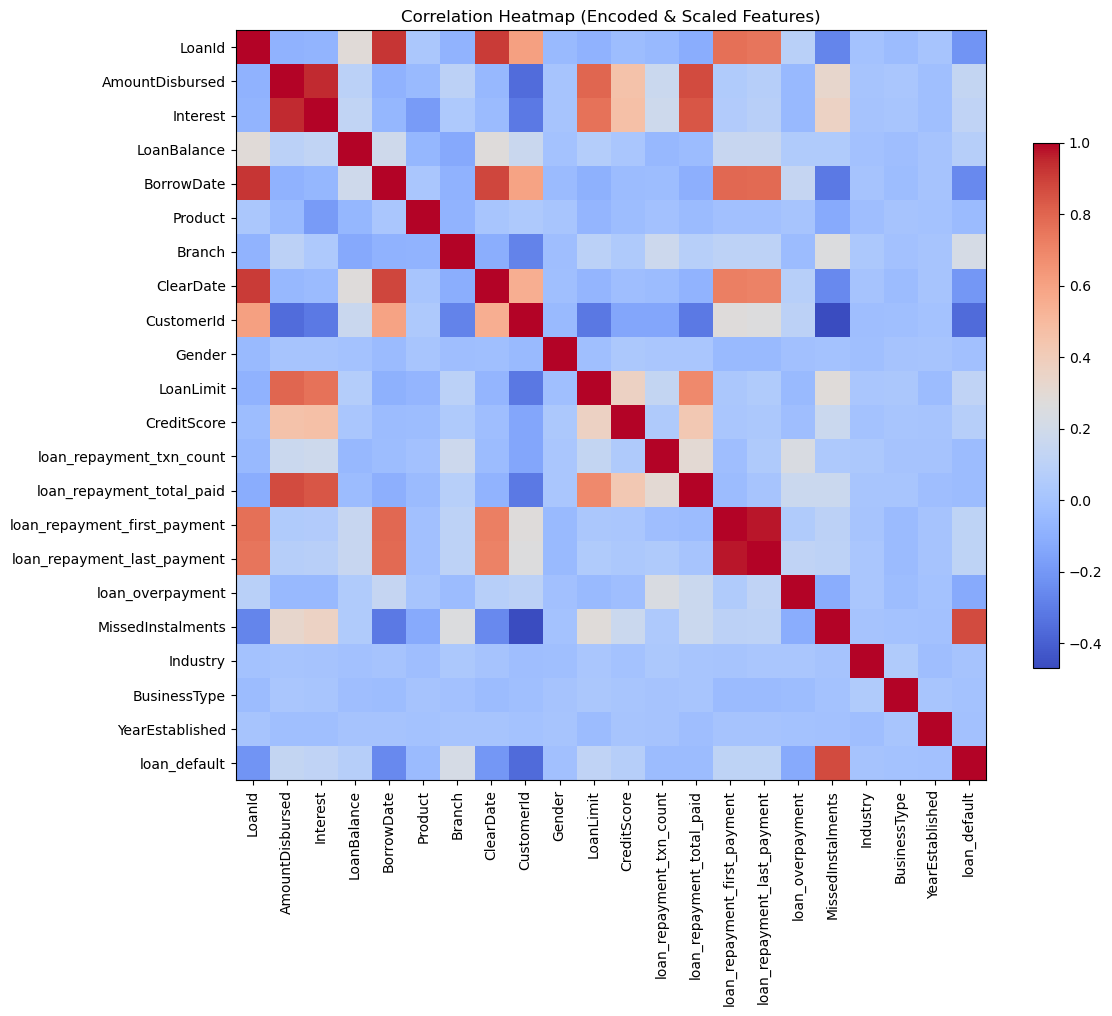

In [20]:
# ================================================
# 5. FEATURE RELATIONSHIPS (VISUALIZATION)
# Purpose: Explore how each feature differs between
# ================================================

import matplotlib.pyplot as plt

# Ensure df_plot has the numeric target column
df_plot = df_clean.copy()
df_plot[target_col] = df_prep[target_col]  # numeric 0/1 target


# ============================================================
# Helper function to generate bar charts with value labels
# ============================================================
def plot_feature_vs_default(df, feature, target="loan_default"):
    """
    Plots the average value of a feature for repaid vs defaulted loans.
    Adds numeric labels on bars for clarity.
    """

    if feature not in df.columns:
        print(f"Feature '{feature}' not found.")
        return
    
    # Compute averages for repaid (0) and default (1)
    avg_values = df.groupby(target)[feature].mean()

    labels = ["Repaid (0)", "Default (1)"]
    values = avg_values.values

    # -----------------------------
    # BAR CHART WITH LABELS
    # -----------------------------
    plt.figure(figsize=(7, 4))
    bars = plt.bar(labels, values, color=["green", "red"])

    # Add numeric labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{height:.2f}",
            ha="center",
            va="bottom",
            fontsize=10
        )

    plt.title(f"Average {feature} by Loan Default")
    plt.xlabel("Loan Default (0 = repaid, 1 = default)")
    plt.ylabel(f"Average {feature}")
    plt.show()


# ------------------------------------------------
# 5.1 AmountDisbursed vs Default
# Why this feature?
# Larger disbursed amounts may increase repayment pressure.
# Helps assess whether high-value loans carry higher risk.
# Borrowers who defaulted received higher average loan amounts than those who repaid
# ------------------------------------------------
plot_feature_vs_default(df_plot, "AmountDisbursed", target_col)


# ------------------------------------------------
# 5.2 Interest vs Default
# Why this feature?
# Higher interest rates increase repayment burden.
# Useful for understanding pricing-related risk.
# Loans that default tend to carry higher interest rates, indicating that interest is a meaningful risk factor.
# ------------------------------------------------
plot_feature_vs_default(df_plot, "Interest", target_col)



# ------------------------------------------------
# 5.3 LoanBalance vs Default
# Why this feature?
# High outstanding balances indicate financial stress.
# Helps identify whether customers with large unpaid amounts default more.
# Borrowers who defaulted had significantly higher average loan balances, indicating that larger unpaid amounts are linked to increased default risk.
# ------------------------------------------------
plot_feature_vs_default(df_plot, "LoanBalance", target_col)


# ------------------------------------------------
# 5.4 CreditScore vs Default
# Why this feature?
# Credit score is a traditional risk indicator.
# Helps validate whether internal scoring aligns with actual default patterns.
# Borrowers who defaulted had higher average credit scores, suggesting the score may reflect internal risk or be inversely scaled
# ------------------------------------------------
plot_feature_vs_default(df_plot, "CreditScore", target_col)


# ------------------------------------------------
# 5.5 Missed Instalments vs Default
# Why this feature?
# Missed instalments are a direct behavioural signal of repayment difficulty.
# Often the strongest predictor of imminent default.
# Borrowers who defaulted missed an average of 5 instalments, while repayers missed none — making this the strongest predictor of default.
# ------------------------------------------------
plot_feature_vs_default(df_plot, "MissedInstalments", target_col)


# ------------------------------------------------
# 5.6 Default Rate by Branch
# Why this feature?
# Branch-level differences may reveal operational, demographic, or portfolio-quality issues.
# Helps identify high-risk locations for intervention.
# The Molo branch shows a much higher default rate than Engineer, suggesting branch-level risk differences worth investigating
# ------------------------------------------------
if "Branch" in df_clean.columns:
    avg_default = df_plot.groupby("Branch")[target_col].mean()

    plt.figure(figsize=(10, 5))
    bars = plt.bar(avg_default.index, avg_default.values, color="steelblue")

    # Add numeric labels
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{height:.2f}",
            ha="center",
            va="bottom",
            fontsize=9
        )

    plt.title("Default Rate by Branch")
    plt.xlabel("Branch")
    plt.ylabel("Default Rate")
    plt.xticks(rotation=45)
    plt.show()


# ------------------------------------------------
# 5.7 Correlation Heatmap
# Why this feature?
# Shows linear relationships between all numeric variables.
# Helps identify which features are most predictive of default.
# The heatmap highlights missed instalments, Branch, and Interest as strong predictors of loan default, while features like Industry and Gender show minimal influence
# ------------------------------------------------
plt.figure(figsize=(12, 10))
corr_matrix = df_prep.corr()

plt.imshow(corr_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar(shrink=0.7)
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Correlation Heatmap (Encoded & Scaled Features)")
plt.tight_layout()
plt.show()

In [19]:
print(df_clean.columns.tolist())

['LoanId', 'AmountDisbursed', 'Interest', 'LoanBalance', 'BorrowDate', 'Product', 'Branch', 'ClearDate', 'CustomerId', 'Gender', 'LoanLimit', 'CreditScore', 'loan_repayment_txn_count', 'loan_repayment_total_paid', 'loan_repayment_first_payment', 'loan_repayment_last_payment', 'loan_overpayment', 'MissedInstalments', 'Industry', 'BusinessType', 'YearEstablished']



Classification report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       528
           1       1.00      1.00      1.00       514

    accuracy                           1.00      1042
   macro avg       1.00      1.00      1.00      1042
weighted avg       1.00      1.00      1.00      1042

ROC-AUC: 1.0000


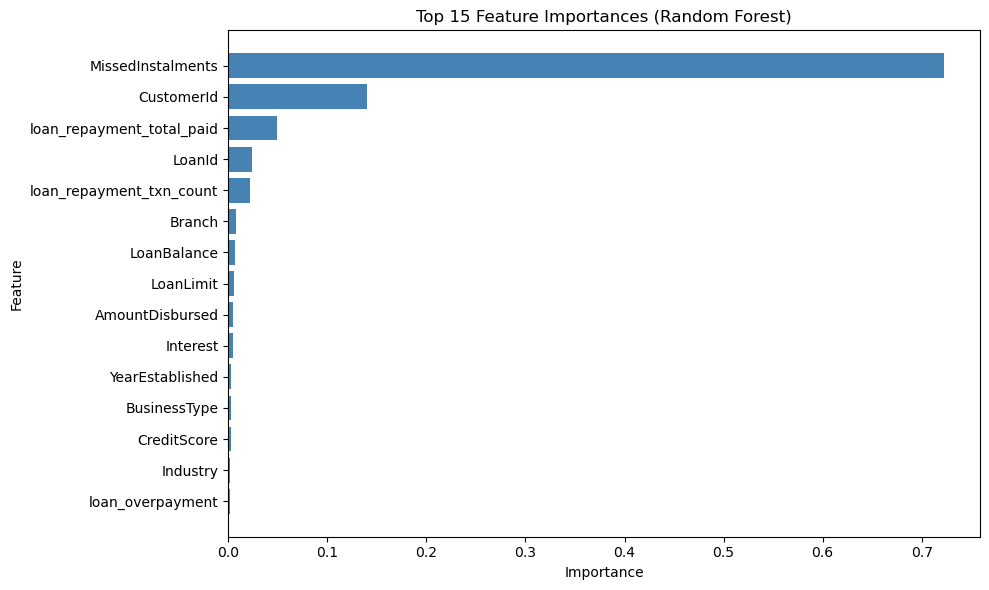

In [18]:
# ================================================
# 6. BASELINE MODEL: RANDOM FOREST
# Train/test split
# Fit model
# Evaluate performance
# ================================================

# Required imports
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------------------------
# Ensure X contains only numeric features
# ------------------------------------------------
# Drop datetime columns or convert them before training
X_numeric = X.select_dtypes(include=["number"])
y_numeric = y  # target stays as-is

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_numeric, y_numeric, test_size=0.30, random_state=42, stratify=y_numeric
)

# Model
model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced"  # good for imbalanced defaults
)

model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("\nClassification report (Random Forest):")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC: {roc_auc:.4f}")

# ================================================
# 6.1 Feature importance plot (top 15 features)
# ================================================
importances = pd.Series(model.feature_importances_, index=X_numeric.columns)
importances_sorted = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
plt.barh(importances_sorted.index, importances_sorted.values, color="steelblue")
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # highest importance at the top
plt.tight_layout()
plt.show()



# The Random Forest model predicts loan default with perfect accuracy on the test set, driven primarily by missed instalments and repayment behavior. 
# While performance is exceptional, further validation is needed to ensure generalizability and avoid overfitting
# Perfect scores across all metrics suggest the model predicts loan default with 100% accuracy on the test set.
# Precision of 1.00 means every predicted default was truly a default.
# Recall of 1.00 means the model caught every actual default.
# F1-score balances precision and recall also perfect.
# ROC-AUC of 1.0000 confirms flawless separation between repaid and defaulted loans.
